First 5000 with beta = [1,20]
Next 2000 with beta = [1,30]

In [41]:
import pandas as pd
import numpy as np
import os

columns = ['Sim_ID', 'Stable', 'Norbits', 'beta1', 'beta2']
for i in ['1', '2', '3']:
    columns += ['M'+i, 'a'+i, 'P'+i, 'e'+i, 'pomega'+i, 'inc'+i, 'Omega'+i, 'f'+i]
columns += ['Rel_Eerr', 'integ_time']

frames = []
path = '/mnt/raid-cita/dtamayo/newstability/data/csvs/'
for f in os.listdir(path):
        if f.startswith('run'):
            frames.append(pd.read_csv(path+f, names=columns, index_col=0))

df = pd.concat(frames)
df = df.sort_index()
df.tail()

,Stable,Norbits,beta1,beta2,M1,a1,P1,e1,pomega1,inc1,...,M3,a3,P3,e3,pomega3,inc3,Omega3,f3,Rel_Eerr,integ_time
Sim_ID,,,,,,,,,,,,,,,,,,,,,
6995,True,1.000000e+09,16.147181,14.978431,3.050753e-06,1.0,0.999998,0.001669,3.844670,0.011021,...,4.430895e-06,3.223863,5.787314,0.001154,-1.079547,0.041981,-2.187987,1.868689,1.413281e-07,29087.501655
6996,True,1.000000e+09,9.315554,16.049164,6.168247e-06,1.0,0.999997,0.001680,-1.789151,0.011505,...,5.253585e-07,1.256414,1.408308,0.003647,-0.884020,0.001070,0.262526,-1.448879,2.110341e-06,30167.477454
6997,True,1.000000e+09,27.017534,21.195829,6.067844e-07,1.0,1.000000,0.013757,-1.603047,0.006394,...,7.523320e-07,2.227159,3.323695,0.095041,-0.163441,0.010220,-1.696172,1.120783,4.573029e-08,29039.589788
6998,True,1.000000e+09,28.780209,4.799240,3.090281e-04,1.0,0.999846,0.002212,-0.547050,0.001711,...,1.413974e-04,2.773517,4.617927,0.017286,0.738738,0.001513,-1.313321,-0.461693,1.129842e-06,28777.960819
6999,False,1.017000e+01,3.352405,25.096161,3.625204e-06,1.0,0.999998,0.054750,-2.390494,0.002857,...,7.636792e-06,3.224994,5.789075,0.001083,3.779019,0.028088,1.397913,-4.193299,9.046703e-07,0.004165


In [42]:
df.shape

(7000, 30)

In [43]:
df.to_csv('/mnt/raid-cita/dtamayo/newstability/data/dataframes/dfelements_full.csv', encoding='ascii')

In [45]:
dfcut = df.loc[df["Norbits"] > 1000.]
dfcut.shape

(5469, 30)

In [47]:
dfcut.to_csv('/mnt/raid-cita/dtamayo/newstability/data/dataframes/dfelements_full.csv', encoding='ascii')

In [49]:
dftrain = dfcut.head(4000)
dftest = dfcut.tail(1469)

In [52]:
dftrain.to_csv('/mnt/raid-cita/dtamayo/newstability/data/dataframes/dfelements_train.csv', encoding='ascii')
dftest.to_csv('/mnt/raid-cita/dtamayo/newstability/data/dataframes/dfelements_test.csv', encoding='ascii')

(array([ 860.,  870.,  864.,  839.,  804.,  817.,  689.,  520.,  364.,  109.]),
 array([-2.9999591 , -2.75371159, -2.50746407, -2.26121656, -2.01496904,
        -1.76872153, -1.52247402, -1.2762265 , -1.02997899, -0.78373147,
        -0.53748396]),
 <a list of 10 Patch objects>)

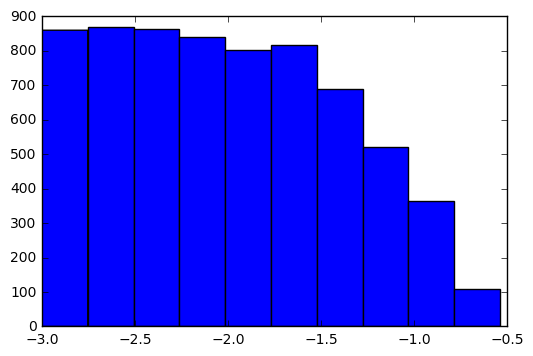

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(np.log10(df['e1']))

In [29]:
df["emax"] = df[["e1", "e2", "e3"]].max(axis=1)
df["betasum"] = df["beta1"] + df["beta2"]
dfcut = df.loc[(df["betasum"] > 25.) & (df["Stable"] == False)]
dfcut.shape

(547, 32)

(array([   5.,    7.,   21.,   22.,   47.,   70.,   95.,  124.,  108.,   48.]),
 array([-2.50551294, -2.315178  , -2.12484305, -1.93450811, -1.74417317,
        -1.55383823, -1.36350329, -1.17316835, -0.9828334 , -0.79249846,
        -0.60216352]),
 <a list of 10 Patch objects>)

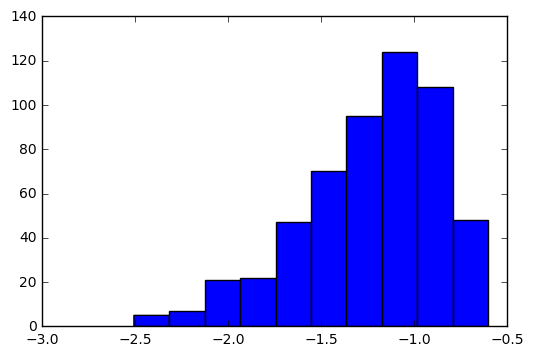

In [30]:
plt.hist(np.log10(dfcut["emax"]))

(array([ 768.,  994.,  777.,  532.,  397.,  309.,  249.,  214.,  165.,
         117.,   97.,   71.,   65.,   49.,   47.,   25.,   37.,   25.,
          16.,   10.,   10.,    8.,    3.,    5.,    4.,    3.,    1.,
           1.,    0.,    1.]),
 array([ 1.01113104,  1.09582926,  1.18052748,  1.2652257 ,  1.34992392,
         1.43462213,  1.51932035,  1.60401857,  1.68871679,  1.773415  ,
         1.85811322,  1.94281144,  2.02750966,  2.11220787,  2.19690609,
         2.28160431,  2.36630253,  2.45100074,  2.53569896,  2.62039718,
         2.7050954 ,  2.78979361,  2.87449183,  2.95919005,  3.04388827,
         3.12858648,  3.2132847 ,  3.29798292,  3.38268114,  3.46737935,
         3.55207757]),
 <a list of 30 Patch objects>)

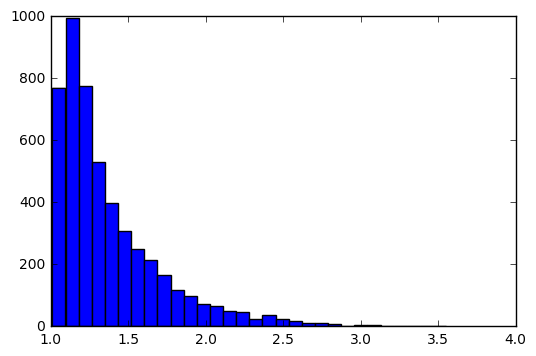

In [33]:
df["Pratio1"] = df["P2"]/df["P1"]
df["Pratio2"] = df["P3"]/df["P2"]
df["Pratiomin"] = df[["Pratio1", "Pratio2"]].min(axis=1)
plt.hist(df['Pratiomin'], 30)

(array([    2.,     4.,    13.,    32.,    75.,   116.,   176.,   172.,
          166.,   147.,   165.,   139.,   142.,   133.,   160.,   152.,
          165.,   139.,   166.,   147.,   136.,   150.,   117.,   117.,
          109.,   113.,    98.,    91.,    89.,  1569.]),
 array([-1.04575749, -0.71089891, -0.37604032, -0.04118174,  0.29367684,
         0.62853542,  0.96339401,  1.29825259,  1.63311117,  1.96796976,
         2.30282834,  2.63768692,  2.97254551,  3.30740409,  3.64226267,
         3.97712125,  4.31197984,  4.64683842,  4.981697  ,  5.31655559,
         5.65141417,  5.98627275,  6.32113134,  6.65598992,  6.9908485 ,
         7.32570708,  7.66056567,  7.99542425,  8.33028283,  8.66514142,  9.        ]),
 <a list of 30 Patch objects>)

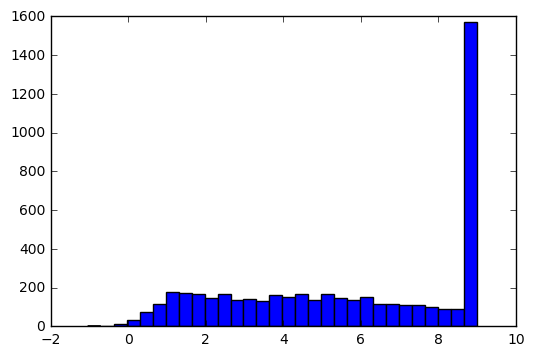

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(np.log10(df['Norbits']), 30)

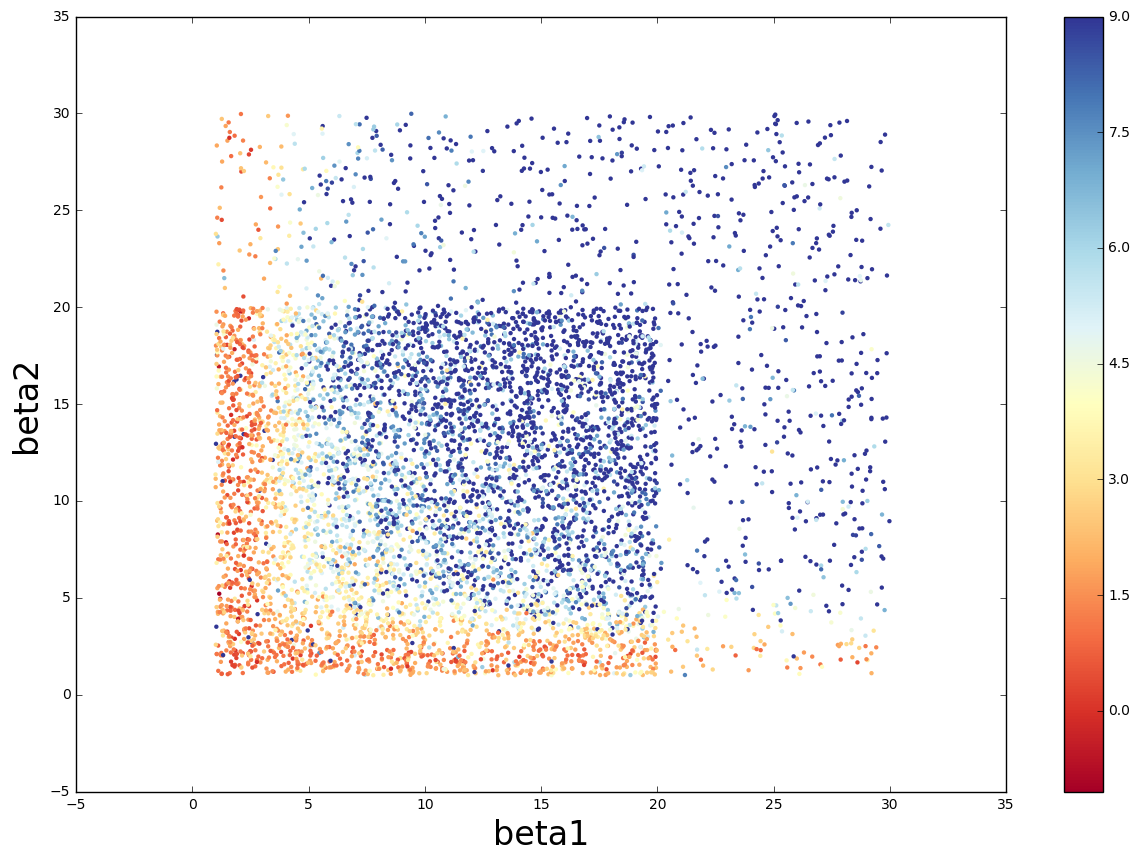

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,10))
cm = plt.cm.get_cmap('RdYlBu')
dfplot = df.loc[df["Norbits"] > 0.]
sc = ax.scatter(dfplot['beta1'], dfplot['beta2'], c=np.log10(dfplot['Norbits']), edgecolor='', s=10,cmap=cm)
ax.set_xlabel('beta1', fontsize=24)
ax.set_ylabel('beta2', fontsize=24)
plt.colorbar(sc)

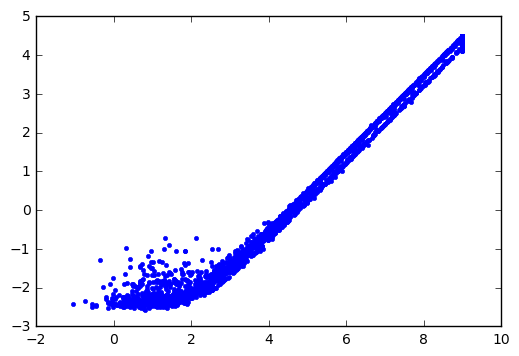

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(np.log10(df['Norbits']), np.log10(df['integ_time']), '.')

In [44]:
df["Stable"].value_counts()

False    4487
True     2513
Name: Stable, dtype: int64

In [38]:
dfplot["Stable"].value_counts()

False    2949
True     2256
Name: Stable, dtype: int64

In [28]:
df["integ_time"].max()

31446.013113000001

In [34]:
df.loc[df["Norbits"] < 1000.].shape

(496, 30)

In [40]:
df["integ_time"].sum()/3600

4781.8741791009725

In [3]:
df["integ_time"].max()/100

314.46013113000004

In [46]:
dfcut["Stable"].value_counts()

False    2956
True     2513
Name: Stable, dtype: int64